<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  643 non-null    int64  
 1   T           643 non-null    float64
 2   TM          643 non-null    float64
 3   Tm          643 non-null    float64
 4   SLP         643 non-null    float64
 5   H           643 non-null    float64
 6   VV          643 non-null    float64
 7   V           643 non-null    float64
 8   VM          643 non-null    float64
 9   PM 2.5      643 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 50.4 KB


<Axes: >

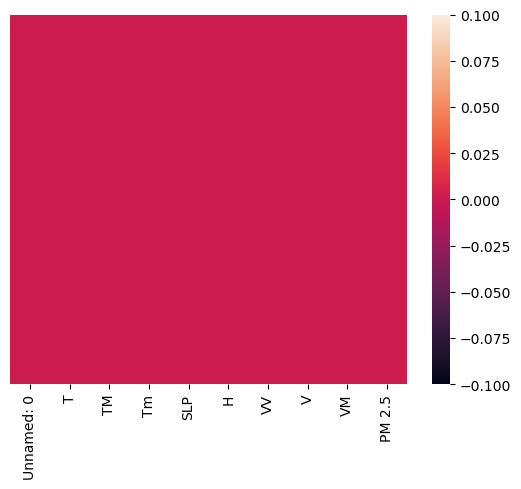

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Reading csv file
combine_data= pd.read_csv('Real_combine.csv')
# checking no of numerical features
combine_data.info()
# To get statistical information
combine_data.describe()
# Now we need check null values
combine_data.isnull()
combine_data.isnull().sum()
# we also visualize null with seaborn
sns.heatmap(combine_data.isnull(),yticklabels=False)

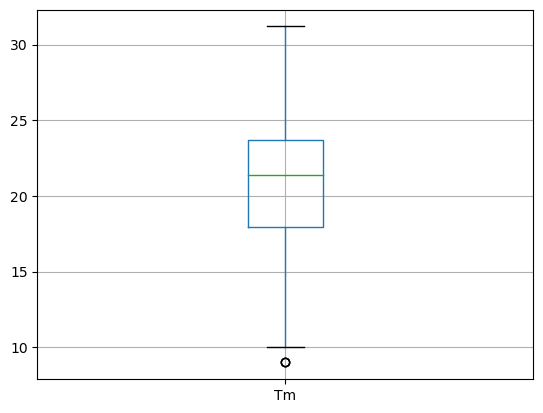

In [3]:
# checking outliers 
combine_data.boxplot(column='Tm')
plt.show()

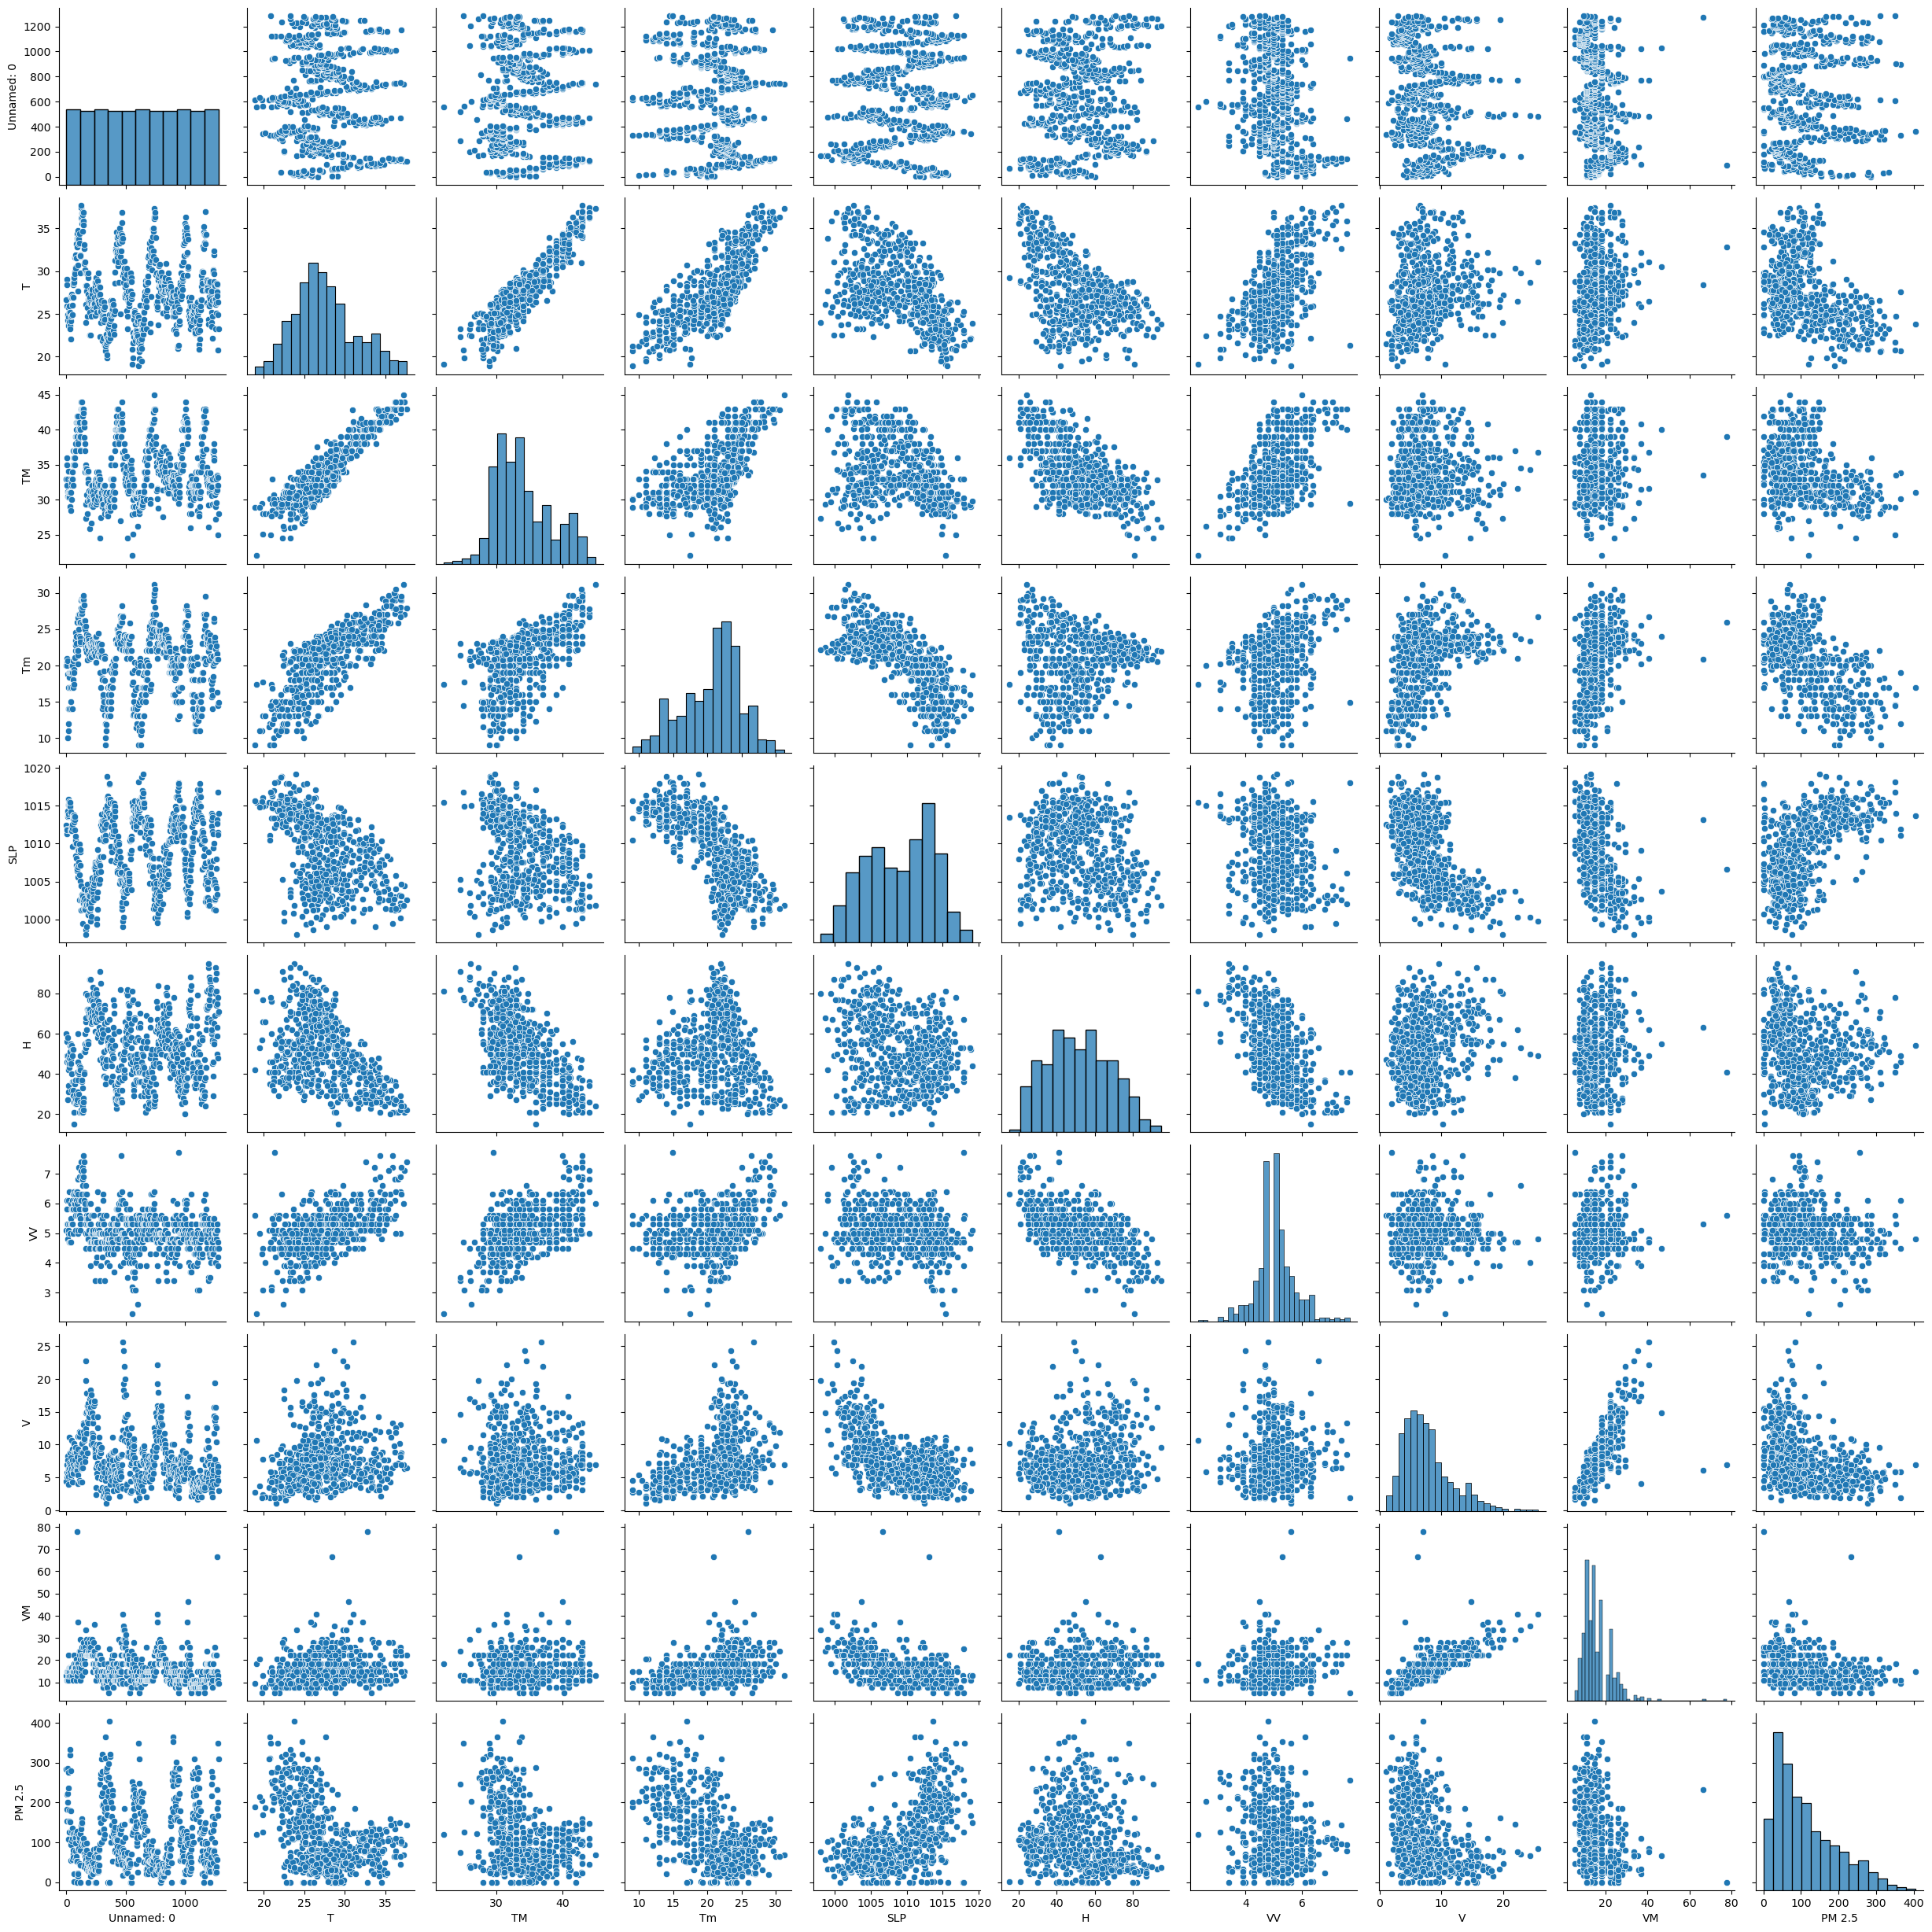

In [4]:
# Multivariate anlaysis
sns.pairplot(combine_data)

<Axes: >

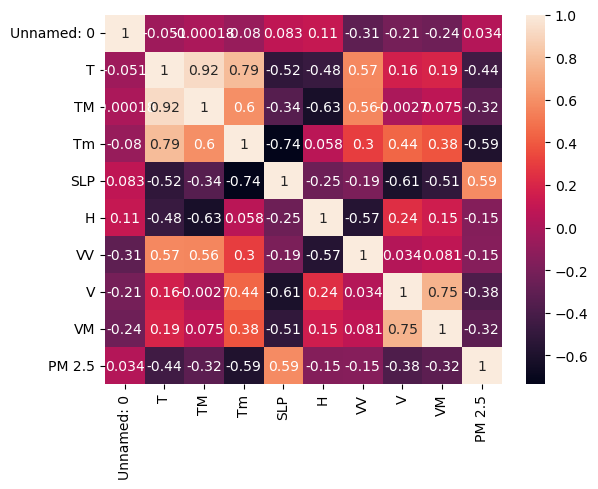

In [5]:
# We also check the corelation between dependent and independent feature
combine_data.corr()
relation =combine_data.corr()
relation_index=relation.index
sns.heatmap(combine_data[relation_index].corr(),annot=True)

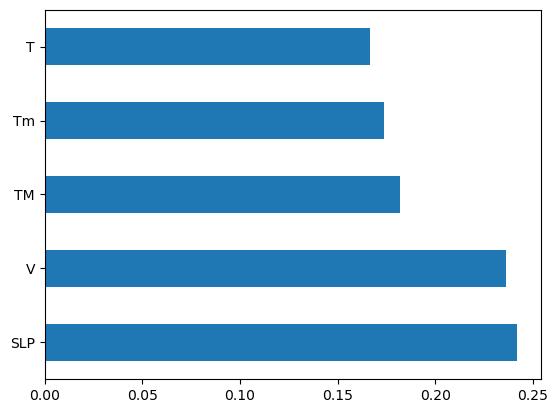

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)
reg.feature_importances_
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


# RANDOM FOREST REGRESSOR

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\rgukt\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
255 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rgukt\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rgukt\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\rgukt\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\rgukt\anaconda3\Lib\site-package

MSE: 0.06957128902297302


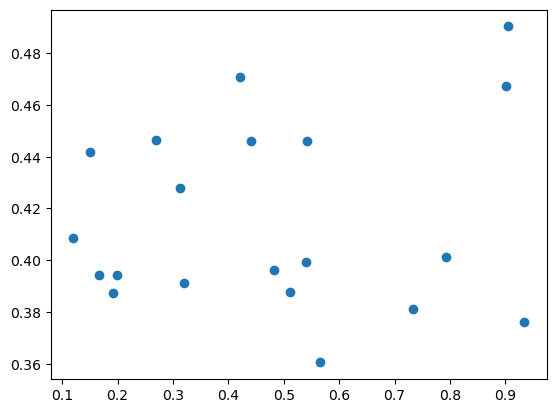

In [18]:
# Hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Hyparameter ranges
from scipy.stats import randint
parameters = {'n_estimators': randint(100,1200),
               'max_features': ['auto','sqrt'],
               'max_depth': randint(5,40),
               'min_samples_split': randint(2,30),
               'min_samples_leaf': randint(1,10)  }
# Model for tuning
base_learner=RandomForestRegressor()
# Tuning
tuned_model= RandomizedSearchCV(estimator = base_learner, param_distributions = parameters,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs =-1)
tuned_model.fit(X_train,y_train)
tuned_model.best_params_
{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 901}
tuned_model.best_score_
-3425.3665578465598
# Predicting X_test values using tuned_model
prediction=tuned_model.predict(X_test)
plt.scatter(y_test,prediction)
print('MSE:', metrics.mean_squared_error(y_test, prediction))


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Assuming combine_data is already defined and is a pandas DataFrame
# Here's an example of how you might load your DataFrame:
combine_data = pd.read_csv('Real_combine.csv')

# Taking top 5 features for deployment 
# Top 5 features taken from the ExtraTrees regressor
X_train, X_test, y_train, y_test = train_test_split(combine_data.iloc[:, [0, 1, 2, 3, 6]], combine_data.iloc[:, -1], test_size=0.3, random_state=0)

# Initializing model
random_forest_reg1 = RandomForestRegressor(n_estimators=901, max_depth=5, min_samples_split=16, min_samples_leaf=1, max_features='sqrt', n_jobs=-1)

# Fitting model
random_forest_reg1.fit(X_train, y_train)

# Scoring the model
train_score = random_forest_reg1.score(X_train, y_train)
test_score = random_forest_reg1.score(X_test, y_test)

print('Train score:', train_score)
print('Test score:', test_score)

# Making predictions
prediction = random_forest_reg1.predict(X_test)

# Calculating Mean Squared Error
mse = metrics.mean_squared_error(y_test, prediction)
print('MSE:', mse)


Train score: 0.6226881941316746
Test score: 0.4932666364153089
MSE: 3456.0294596426697


In [9]:
import pickle
pickle_out = open("Random_forest_regressor.pkl","wb")
pickle.dump(random_forest_reg1, pickle_out)
pickle_out.close()

In [10]:
pip install streamlit


  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/c6/51/f140402202af6ce1bf747243f66415c5eb2f43ba2e2ac419a7e855d20673/streamlit-1.36.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/46/30/2118537233fa72c1d91a81f5908a7e843a6601ccc68b76838ebc4951505f/altair-5.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bb/2a/10164ed1f31196a2f7f3799368a821765c62851ead0e630ab52b8e14b4d0/blinker-1.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/fb/2b/a64c2d25a37aeb921fddb929111413049fc5f8b9a4c1aefaffaafe768d54/cachetools-5.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/e9/bd/cc3a402a6439c15c3d4294333e13042b915bbeab54edc4

In [ ]:
!streamlit run app.py
#HERE app.py IS SAVED IN NOTEPAD
#just run this cmd and the output  will be open in browser
